In [2]:
import pandas as pd
import numpy as np
import os
data_path = 'online_retail.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
clv_reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("CLV Reference Date:", clv_reference_date)


CLV Reference Date: 2011-12-10 12:50:00


In [5]:
clv_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (clv_reference_date - x.max()).days, 
    'InvoiceNo': 'nunique',                                        
    'TotalPrice': 'sum'                                            
}).reset_index()

clv_df.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']

clv_df.head()


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [6]:

clv_df['CLV'] = clv_df['MonetaryValue'] / clv_df['Frequency'] * clv_df['Frequency']


In [9]:
cleaned_path = 'clv_cleaned.csv'
clv_df.to_csv(cleaned_path, index=False)
print("Cleaned data saved to:", cleaned_path)


Cleaned data saved to: clv_cleaned.csv


In [10]:
import pandas as pd
data_path = 'online_retail.csv'  # If it's in the same folder
df = pd.read_csv(data_path, encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
import os
os.makedirs('data/cleaned', exist_ok=True)
cleaned_path = 'data/cleaned/clv_cleaned.csv'
clv_df.to_csv(cleaned_path, index=False)
print("Cleaned data saved to:", cleaned_path)


Cleaned data saved to: data/cleaned/clv_cleaned.csv


In [12]:
clv_df['CLV_Segment'] = pd.qcut(clv_df['CLV'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
clv_df.head()


,CustomerID,Recency,Frequency,MonetaryValue,CLV,CLV_Segment
0,12346.0,326,1,77183.60,77183.60,High
1,12347.0,2,7,4310.00,4310.00,High
2,12348.0,75,4,1797.24,1797.24,High
3,12349.0,19,1,1757.55,1757.55,High
4,12350.0,310,1,334.40,334.40,Mid-Low


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("clv_segmented_fixed.csv")
df.head()


,CustomerID,Recency,Frequency,MonetaryValue,CLV,CLV_Segment
0,12346.0,326,1,77183.60,77183.60,High
1,12347.0,2,7,4310.00,4310.00,High
2,12348.0,75,4,1797.24,1797.24,High
3,12349.0,19,1,1757.55,1757.55,High
4,12350.0,310,1,334.40,334.40,Mid-Low


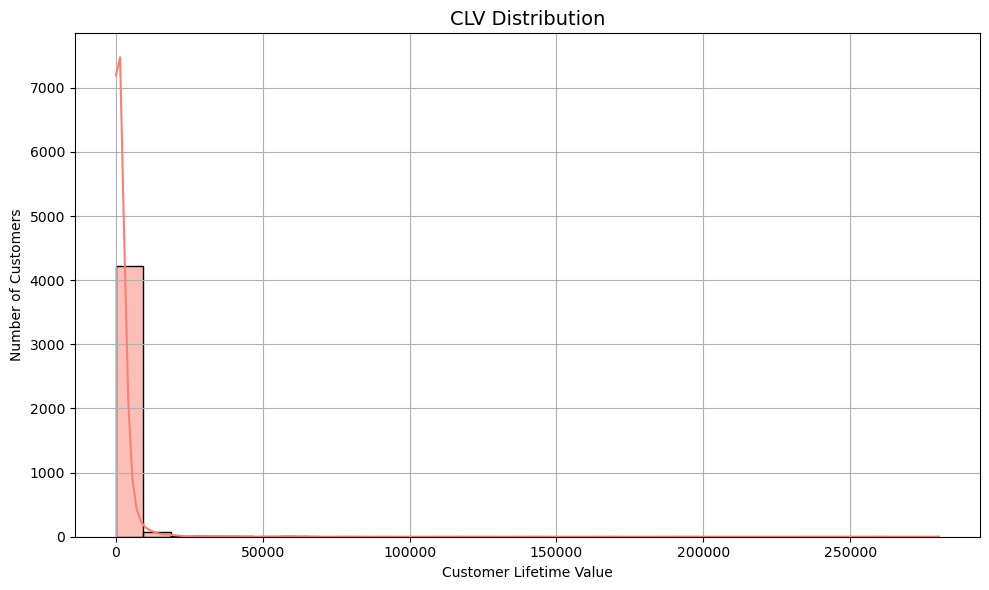

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df["CLV"], bins=30, kde=True, color='salmon')
plt.title("CLV Distribution", fontsize=14)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\daksh\AppData\Local\Temp\ipykernel_6068\97841319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLV_Segment', palette='Set2', order=['High', 'Mid-High', 'Mid-Low', 'Low'])


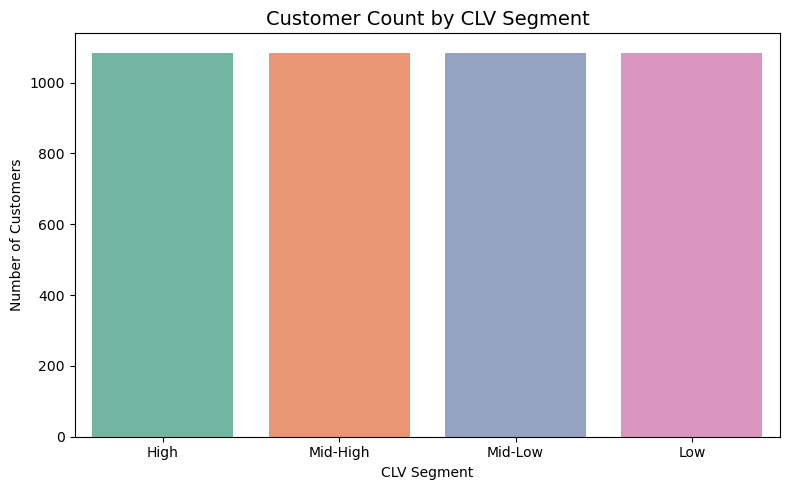

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CLV_Segment', palette='Set2', order=['High', 'Mid-High', 'Mid-Low', 'Low'])
plt.title("Customer Count by CLV Segment", fontsize=14)
plt.ylabel("Number of Customers")
plt.xlabel("CLV Segment")
plt.tight_layout()
plt.show()


In [4]:
df.columns


Index(['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'CLV',
       'CLV_Segment'],
      dtype='object')

C:\Users\daksh\AppData\Local\Temp\ipykernel_6068\186223563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CLV_Segment', y='Recency', palette='coolwarm', order=['High', 'Mid-High', 'Mid-Low', 'Low'])


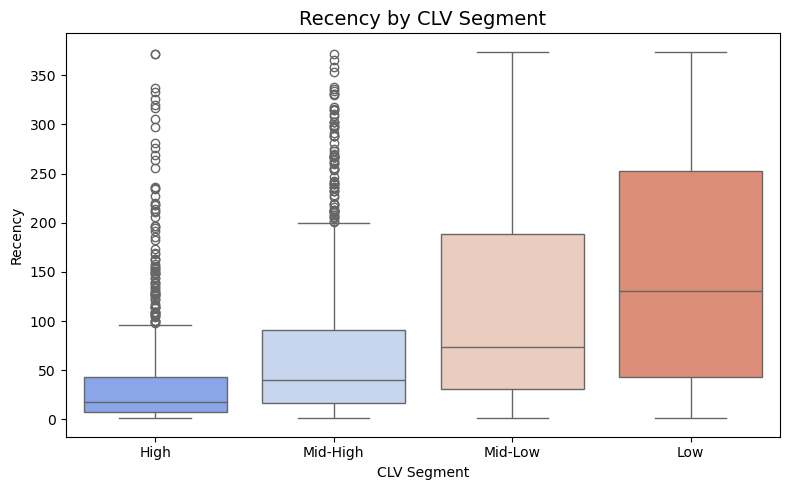

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='CLV_Segment', y='Recency', palette='coolwarm', order=['High', 'Mid-High', 'Mid-Low', 'Low'])
plt.title("Recency by CLV Segment", fontsize=14)
plt.ylabel("Recency")
plt.xlabel("CLV Segment")
plt.tight_layout()
plt.show()


C:\Users\daksh\AppData\Local\Temp\ipykernel_6068\213609637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CLV_Segment', y='Frequency', palette='Blues', order=['High', 'Mid-High', 'Mid-Low', 'Low'])


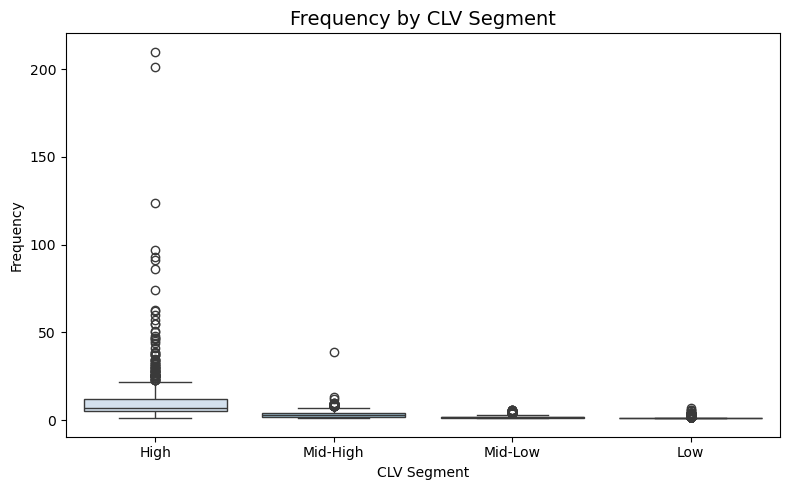

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='CLV_Segment', y='Frequency', palette='Blues', order=['High', 'Mid-High', 'Mid-Low', 'Low'])
plt.title("Frequency by CLV Segment", fontsize=14)
plt.ylabel("Frequency")
plt.xlabel("CLV Segment")
plt.tight_layout()
plt.show()
